<a href="https://colab.research.google.com/github/aleksripe-prog/DataScienceChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


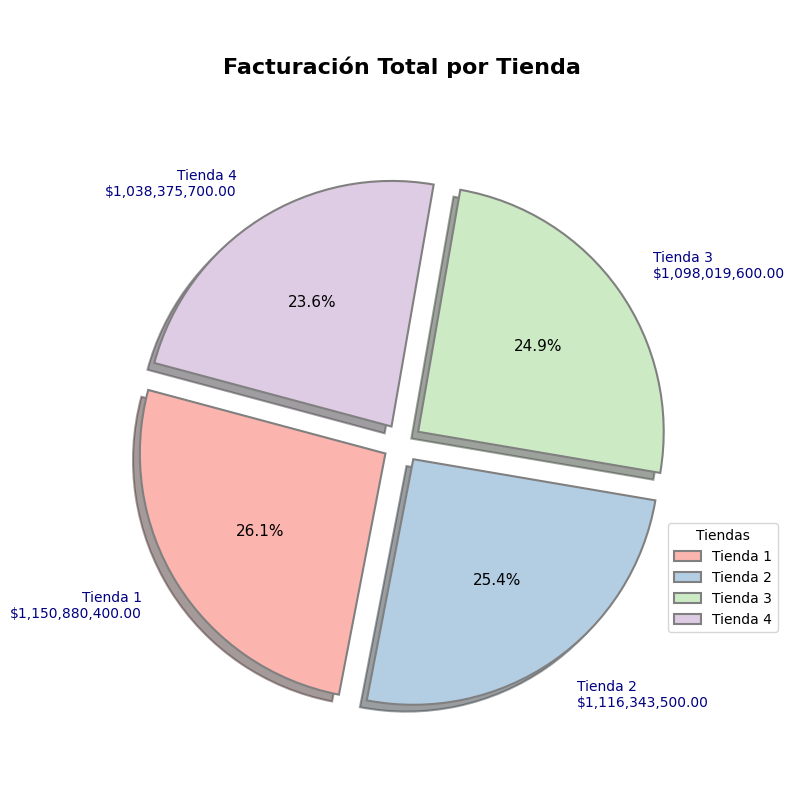

In [3]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive, files

# Montamos Google Drive
drive.mount('/content/drive')

# Diccionario con las URLs de las tiendas
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Leemos los CSV y calculamos la facturación total por tienda
facturacion_total = {}

for tienda, url in urls.items():
    df = pd.read_csv(url)
    facturacion_total[tienda] = df["Precio"].sum()

# Convertimos el diccionario en una Serie ordenada
facturacion_total = pd.Series(facturacion_total).sort_values(ascending=False)
print
# Función para formatear los valores como dinero
def formato_personalizado(valor):
    return f"${valor:,.2f}"

# Extraemos etiquetas y valores
labels = facturacion_total.index
sizes = facturacion_total.values
porcentajes = sizes / sizes.sum() * 100

# Definimos colores y separación
colors = plt.cm.Pastel1.colors
explode = [0.08] * len(labels)

# Se crea el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Creamos el gráfico de pastel
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',            # Porcentaje dentro de cada porción
    wedgeprops={'edgecolor': 'grey', 'linewidth': 1.5},  # Definimos el borde
    explode=explode,
    colors=colors,
    startangle=165,
    shadow=True,
    textprops=dict(color='black', fontsize=11)
)

# Añadimos etiquetas con nombre de tienda e importe total
for i, wedge in enumerate(wedges):      # Recorremos cada pieza del pie (i = índice)
    angulo = (wedge.theta2 + wedge.theta1) / 2.0    # Ubica la etiqueta en el centro angular de c/pieza. Angulo Medio de la Pieza = (Ang.Ini + Ang.Fin)/2
    x = np.cos(np.deg2rad(angulo))      # coordenada horizontal (eje X). Convierte el ángulo de grados a radianes
    y = np.sin(np.deg2rad(angulo))      # coordenada vertical (eje Y). Convierte el ángulo de grados a radianes
    ha = "left" if x > 0 else "right"   # alineación horizontal. Alínea el texto a la izquierda o derecha, dependiendo de si está en el lado izquierdo o derecho del gráfico (basado en la coordenada X).
    ax.text(x * 1.25, y * 1.25,         # aleja la etiqueta del centro, para que no quede sobre la porción sino más afuera
            f"{labels[i]}\n{formato_personalizado(sizes[i])}",  # muestra el nombre de la tienda y el valor debajo.
            ha=ha, va='center', color='navy', fontsize=10)

# Añadimos una leyenda con colores de tienda
ax.legend(wedges, labels, title="Tiendas", loc="center left", bbox_to_anchor=(0.95, -0.2, 0.5, 1))

# Título y formato final
plt.title("\n\nFacturación Total por Tienda\n", fontsize=16, fontweight='bold')
plt.axis('equal')  # Asegura forma circular
plt.tight_layout()

# También puedes descargarlo directamente a tu PC
#files.download("/content/drive/MyDrive/facturacion_por_tienda.pdf")

# Mostramos el gráfico en pantalla
plt.show()

la Tienda 1 es la que más contribuye a la facturación general, aunque la distribución de ingresos entre las cuatro tiendas es relativamente equilibrada, sin que ninguna domine abrumadoramente sobre las otras.

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

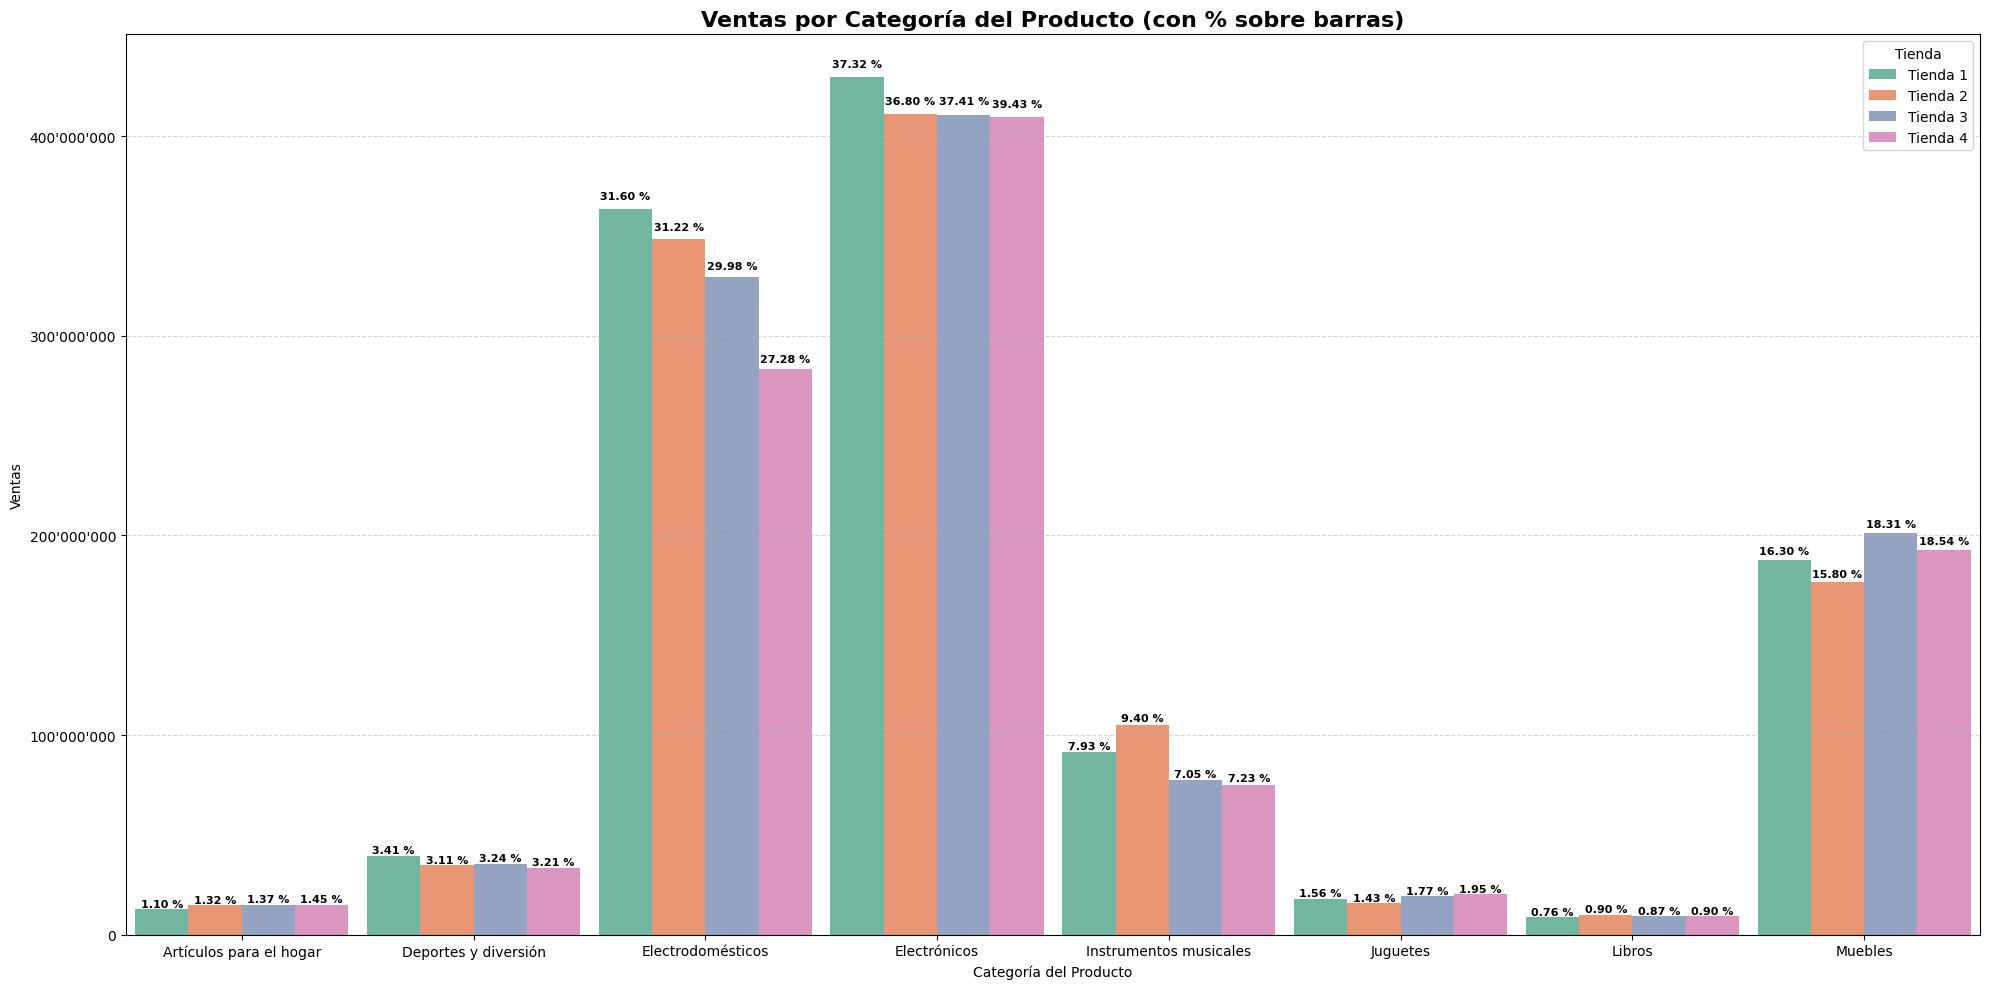


Resumen de ventas por categoría y tienda:



,Tienda,Categoría del Producto,Precio,Porcentaje
0,Tienda 1,Artículos para el hogar,"$12'698'400,00",1.10 %
1,Tienda 1,Deportes y diversión,"$39'290'000,00",3.41 %
2,Tienda 1,Electrodomésticos,"$363'685'200,00",31.60 %
3,Tienda 1,Electrónicos,"$429'493'500,00",37.32 %
4,Tienda 1,Instrumentos musicales,"$91'299'000,00",7.93 %
5,Tienda 1,Juguetes,"$17'995'700,00",1.56 %
6,Tienda 1,Libros,"$8'784'900,00",0.76 %
7,Tienda 1,Muebles,"$187'633'700,00",16.30 %
8,Tienda 2,Artículos para el hogar,"$14'746'900,00",1.32 %
9,Tienda 2,Deportes y diversión,"$34'744'500,00",3.11 %


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

# Lista para almacenar DataFrames individuales
dfs = []

# Lee cada archivo y agregar una columna 'Tienda' para identificar su origen
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda
    dfs.append(df)

# Une todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index=True)

# Agrupar por Tienda y Categoría, y sumar ventas (Precio)
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Cálculo total por tienda
totales_por_tienda = ventas_por_categoria.groupby('Tienda')['Precio'].transform('sum')

# Cálculo porcentaje
ventas_por_categoria['Porcentaje %'] = (ventas_por_categoria['Precio'] / totales_por_tienda) * 100

# Formateando Las columnas precio y %(Porcentaje)
#ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].apply(lambda x: f"{x:,.2f}")
ventas_por_categoria['Porcentaje %'] = ventas_por_categoria['Porcentaje %'].apply(lambda x: f"{x:.2f} %")

# Mostrar resultado
#print(ventas_por_categoria)

# Asegurarse de que Precio es numérico
ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].astype(float)

# Calcular el porcentaje real si no está
ventas_por_categoria['Porcentaje'] = ventas_por_categoria.groupby('Tienda')['Precio'].transform(
    lambda x: x / x.sum() * 100
)

# Crear gráfico solo con porcentaje como etiqueta
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=ventas_por_categoria,
    x='Categoría del Producto',
    y='Precio',
    hue='Tienda',
    palette='Set2',
    dodge=0.6,
    width=0.92
)

# Agregar etiquetas: solo porcentaje con 2 decimales
for bar in ax.patches:
    altura = bar.get_height()
    if altura == 0:
        continue

    x = bar.get_x() + bar.get_width() / 2
    y = altura

    for _, row in ventas_por_categoria.iterrows():
        if abs(row['Precio'] - altura) < 1e-2:
            porcentaje_txt = f"{row['Porcentaje']:.2f} %"
            ax.text(
                x, y + y * 0.01,
                porcentaje_txt,
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
            break

# Formatear eje Y estilo latino
formatter = mtick.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ax.yaxis.set_major_formatter(formatter)

# Estética general
plt.title('Ventas por Categoría del Producto (con % sobre barras)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Crear columnas con formato
ventas_tabla = ventas_por_categoria.copy()
ventas_tabla['Precio'] = ventas_tabla['Precio'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ventas_tabla['Porcentaje'] = ventas_tabla['Porcentaje'].apply(lambda x: f"{x:.2f} %")

# Mostrar tabla final
ventas_tabla_formateada = ventas_tabla[['Tienda', 'Categoría del Producto', 'Precio', 'Porcentaje']]
print("\nResumen de ventas por categoría y tienda:\n")
display(ventas_tabla_formateada)


Las categorías de Electrónicos y Electrodomésticos son consistentemente las más vendidas y las que más contribuyen a los ingresos en todas las tiendas. Muebles también es una categoría importante en todas ellas. Esto sugiere que estas categorías son clave para el negocio y podrían ser áreas focales para estrategias de marketing o inventario.

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

       Tienda                   Producto  Calificación
0    Tienda 1          Ajedrez de madera      4.428571
1    Tienda 1                    Armario      3.950000
2    Tienda 1          Asistente virtual      4.075000
3    Tienda 1                Auriculares      3.640000
4    Tienda 1  Auriculares con micrófono      3.969697
..        ...                        ...           ...
199  Tienda 4                 Smartwatch      3.974359
200  Tienda 4            Sofá reclinable      3.872340
201  Tienda 4              TV LED UHD 4K      3.575000
202  Tienda 4                Tablet ABXY      4.022222
203  Tienda 4               Vaso térmico      4.145833

[204 rows x 3 columns]


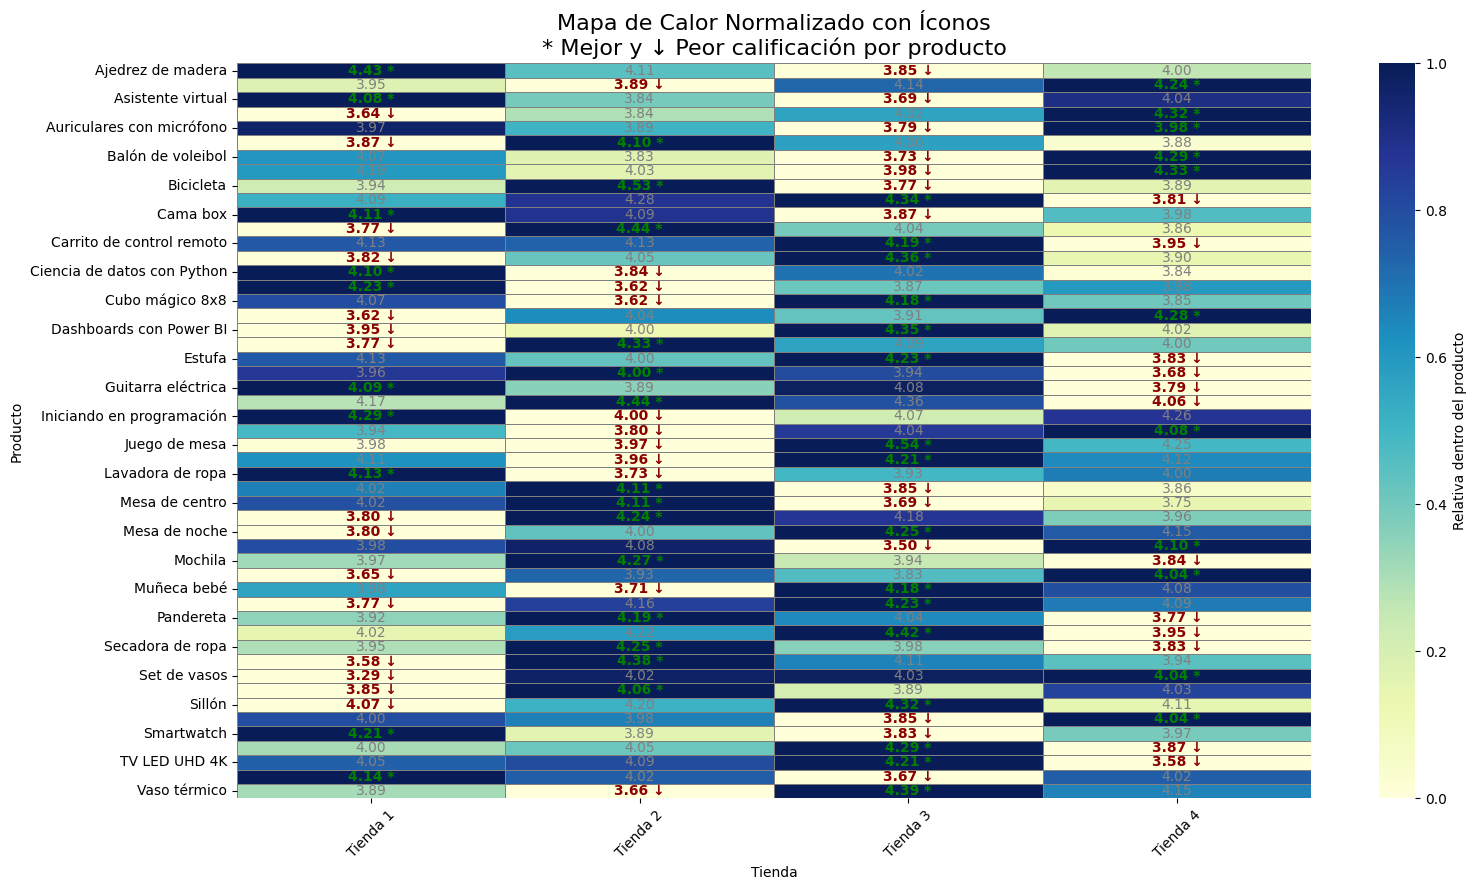

In [8]:
import numpy as np

# Calificación promedio por tienda y producto
promedio_por_producto_tienda = df_total.groupby(['Tienda', 'Producto'])['Calificación'].mean().reset_index()

# Mostramos los primeros resultados
print(promedio_por_producto_tienda)

# Tabla dinámica original
heatmap_data = promedio_por_producto_tienda.pivot(index='Producto', columns='Tienda', values='Calificación')

# Normalizamos por fila
heatmap_normalizado = heatmap_data.subtract(heatmap_data.min(axis=1), axis=0)
heatmap_normalizado = heatmap_normalizado.divide(heatmap_normalizado.max(axis=1), axis=0)

# Mapa base (normalizado)
plt.figure(figsize=(16, 9))
ax = sns.heatmap(
    heatmap_normalizado,
    annot=False,                   # Ocultamos el texto por defecto
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Relativa dentro del producto'},
    vmin=0, vmax=1
)

# Recorremos para añadir íconos y calificaciones
for y, producto in enumerate(heatmap_data.index):
    fila = heatmap_data.loc[producto]
    max_tienda = fila.idxmax()
    min_tienda = fila.idxmin()
    for x, tienda in enumerate(heatmap_data.columns):
        valor = fila[tienda]
        icono = ""
        color = "gray"

        if tienda == max_tienda:
            icono = " *"
            color = "green"
        elif tienda == min_tienda:
            icono = " ↓"
            color = "darkred"

        ax.text(
            x + 0.5, y + 0.5,
            f"{valor:.2f}{icono}",
            ha='center', va='center',
            color=color,
            fontsize=10,
            weight='bold' if icono else 'normal'
        )

# Títulos y ajustes
plt.title('Mapa de Calor Normalizado con Íconos\n* Mejor y ↓ Peor calificación por producto', fontsize=16)
plt.xlabel('Tienda')
plt.ylabel('Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Variabilidad en la Satisfacción: La satisfacción del cliente por un mismo producto puede variar significativamente entre las diferentes tiendas, lo que sugiere diferencias en la calidad de la experiencia de compra o del producto mismo en cada ubicación.
Identificación de Extremos: El mapa de calor resalta con asteriscos los productos que obtienen su mejor calificación en una tienda específica, y con flechas hacia abajo aquellos que reciben su peor calificación. Esto permite una identificación rápida de los puntos fuertes y las áreas de mejora.
Acciones Dirigidas: Este análisis es una herramienta valiosa para que cada tienda identifique dónde está sobresaliendo y dónde necesita intervención, ya sea mejorando la calidad del producto, el servicio al cliente o la descripción del artículo.



# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

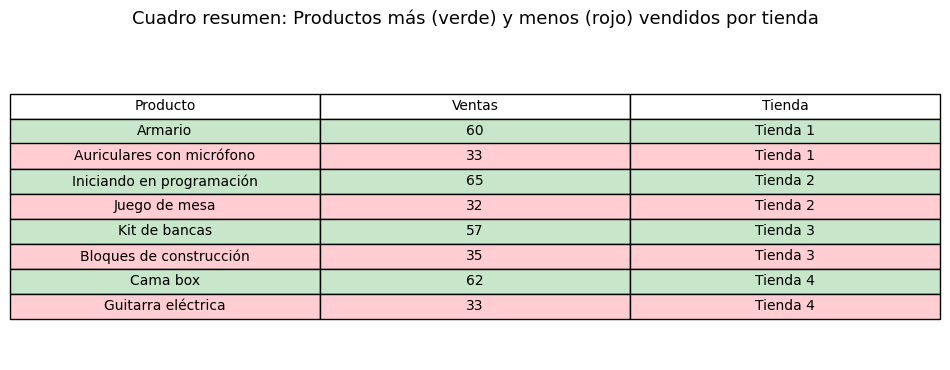

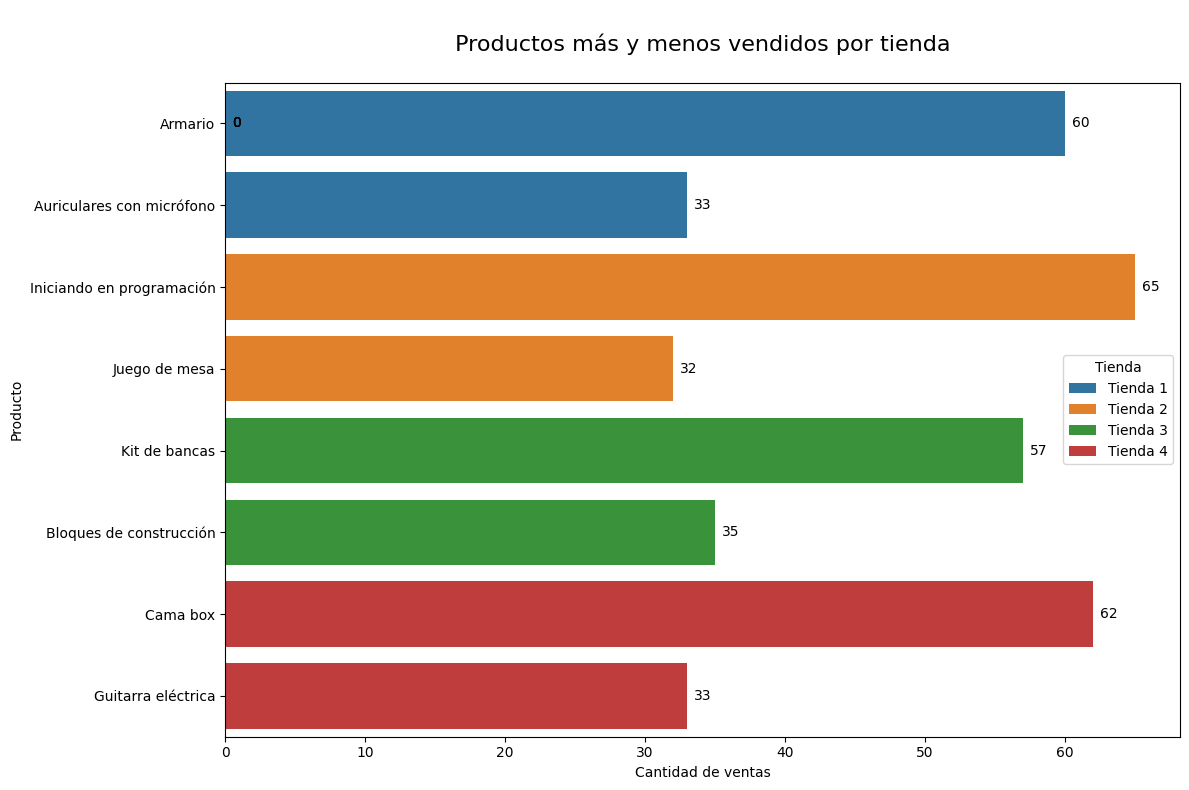

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos la tabla de resumen (como hicimos antes)
ventas_por_producto = df_total.groupby(['Tienda', 'Producto']).size().reset_index(name='Ventas')

def obtener_extremos(grupo, tienda):
    maximo = grupo.loc[grupo['Ventas'].idxmax()].copy()
    minimo = grupo.loc[grupo['Ventas'].idxmin()].copy()
    maximo['Tienda'] = tienda
    minimo['Tienda'] = tienda
    return pd.DataFrame([maximo, minimo])

extremos_list = []
for tienda, grupo in ventas_por_producto.groupby('Tienda'):
    extremos = obtener_extremos(grupo.drop(columns='Tienda'), tienda)
    extremos_list.append(extremos)

extremos_por_tienda = pd.concat(extremos_list, ignore_index=True)
cuadro_resumen = extremos_por_tienda.sort_values(by=["Tienda", "Ventas"], ascending=[True, False])

# --- Mostrar tabla con color
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

tabla = ax.table(
    cellText=cuadro_resumen.values,
    colLabels=cuadro_resumen.columns,
    cellLoc='center',
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)

# Colorea filas: Verde si es más vendido, Rojo si es menos vendido (alternan por tienda)
for i, (_, row) in enumerate(cuadro_resumen.iterrows()):
    color = '#c8e6c9' if i % 2 == 0 else '#ffcdd2'  # Verde claro / Rojo claro
    for j in range(len(row)):
        tabla[(i + 1, j)].set_facecolor(color)

plt.title("Cuadro resumen: Productos más (verde) y menos (rojo) vendidos por tienda", fontsize=13, pad=20)

# --- Paso 4: Gráfico con etiquetas
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=extremos_por_tienda,
    x='Ventas',
    y='Producto',
    hue='Tienda'
)

plt.title("\n Productos más y menos vendidos por tienda \n", fontsize=16)
plt.xlabel("Cantidad de ventas")
plt.ylabel("Producto")
plt.legend(title="Tienda")

# Añadir etiquetas numéricas en las barras
for p in barplot.patches:
    ancho = p.get_width()
    plt.text(
        ancho + 0.5,
        p.get_y() + p.get_height() / 2,
        int(ancho),
        va='center'
    )

plt.tight_layout()
plt.show()


    Tienda 1:
        Más vendido: Armario con 60 ventas.
        Menos vendido: Auriculares con micrófono con 33 ventas.
    Tienda 2:
        Más vendido: Iniciando en programación con 65 ventas.
        Menos vendido: Juego de mesa con 32 ventas.
    Tienda 3:
        Más vendido: Kit de bancas con 57 ventas.
        Menos vendido: Bloques de construcción con 35 ventas.
    Tienda 4:
        Más vendido: Cama box con 62 ventas.
        Menos vendido: Guitarra eléctrica con 33 ventas.


# 5. Envío promedio por tienda

In [10]:


# Calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.
costo_envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio['Costo de envío'] = costo_envio_promedio['Costo de envío'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))

print("\n Costo de envío promedio para cada tienda:\n")
print(costo_envio_promedio)


 Costo de envío promedio para cada tienda:

     Tienda Costo de envío
0  Tienda 1     $26'018,61
1  Tienda 2     $25'216,24
2  Tienda 3     $24'805,68
3  Tienda 4     $23'459,46


     Tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


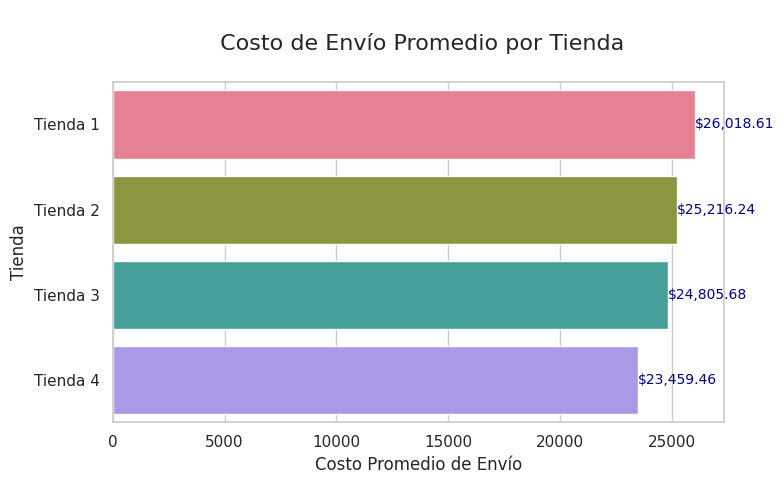

In [13]:


# Mostramos las primeras columnas del DataFrame para identificar el nombre exacto de la columna de envío
#print(df_total.columns)

# Agrupamos por tienda y calculamos el promedio
costo_envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Redondeamos a 2 decimales para mejorar la presentación
costo_envio_promedio["Costo de envío"] = costo_envio_promedio["Costo de envío"].round(2)

# Mostramos la tabla
print(costo_envio_promedio)

# Visualización con gráfico de barras:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=costo_envio_promedio,
    x="Costo de envío",
    y="Tienda",
    hue="Tienda",  # necesario para usar 'palette' sin warning
    palette=sns.color_palette("husl", 4),
    dodge=False,
    legend=False  # no mostrar leyenda duplicada
)

# Añadir etiquetas con los valores sobre las barras
for index, row in costo_envio_promedio.iterrows():
    plt.text(
        row["Costo de envío"] + 0.1,  # posición horizontal
        index,                        # posición vertical
        f"${row['Costo de envío']:,.2f}",  # Separador de miles
        va='center',
        fontsize=10,
        color='darkblue'
    )

# Título y ejes
plt.title("\n Costo de Envío Promedio por Tienda\n ", fontsize=16)
plt.xlabel("Costo Promedio de Envío")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

Este análisis revela que existe una variación en el costo de envío promedio entre las tiendas. La Tienda 1 es la que incurre en los mayores costos promedio por envío, mientras que la Tienda 4 es la más eficiente en este aspecto. Esta información podría ser útil para investigar las razones detrás de estas diferencias (por ejemplo, distancia a los clientes, tipos de productos vendidos, acuerdos con transportistas) y buscar optimizaciones para reducir los costos de envío en las tiendas con promedios más altos